In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Load the dataset
data = pd.read_csv('Amazon Sales data.csv')

In [94]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [98]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


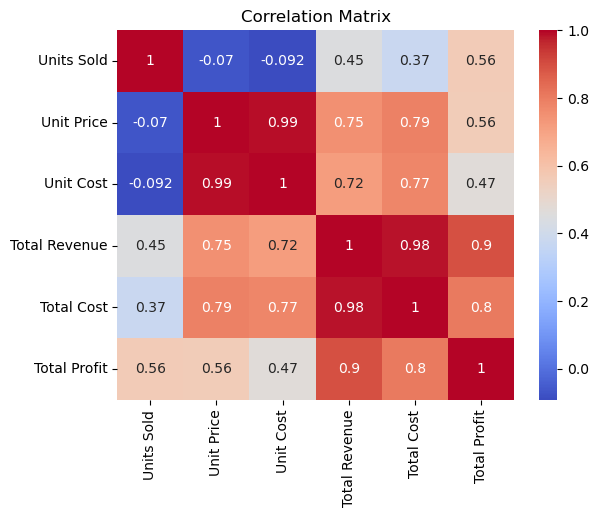

In [104]:
correlation_matrix = data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

In [107]:
# Machine Learning Models
# Regression Models
X = data[['Units Sold', 'Unit Price', 'Unit Cost']]
y = data['Total Revenue']

In [110]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

In [113]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
degree = 1
linear_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())

In [117]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [119]:
mse_poly = mean_squared_error(y_test, linear_predictions)
r2_poly = r2_score(y_test, linear_predictions)
print("Mean Squared Error (Polynomial Regression):", mse_poly)
print("R-squared (Polynomial Regression):", r2_poly)

Mean Squared Error (Polynomial Regression): 322510611072.7175
R-squared (Polynomial Regression): 0.8543165315212506


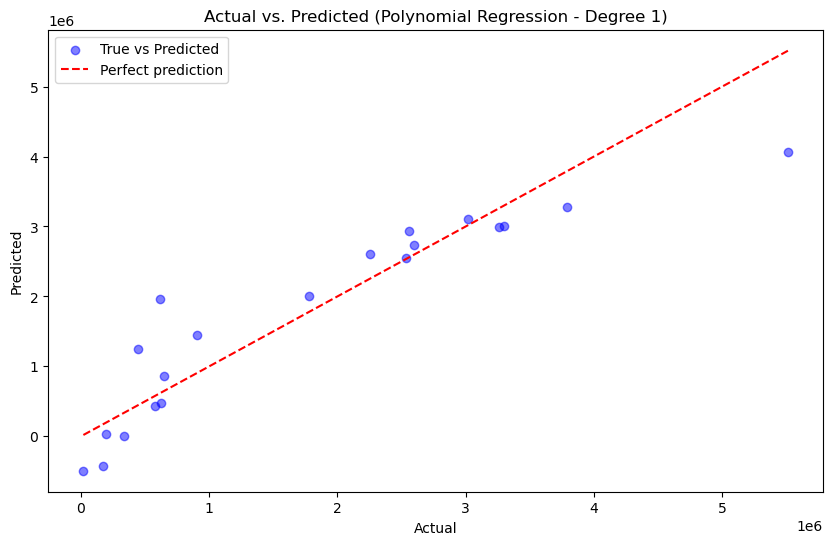

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions,color='blue', label='True vs Predicted', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted (Polynomial Regression - Degree {degree})')
plt.legend()
plt.show()

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [126]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [128]:
# R squared error
error_score = metrics.r2_score(y_test, rf_predictions)
print("R squared error : ", error_score)

R squared error :  0.9649714492673243


In [130]:
y_test_list = list(y_test)

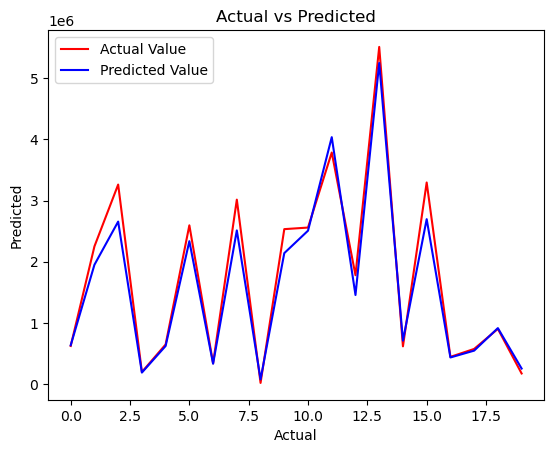

In [132]:
plt.plot(y_test_list, color='red', label = 'Actual Value')
plt.plot(rf_predictions, color='blue', label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [134]:
# Clustering Models
# K-Means Clustering
clustering_features = data[['Units Sold', 'Total Revenue', 'Total Profit']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_features)

C:\Users\uzman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


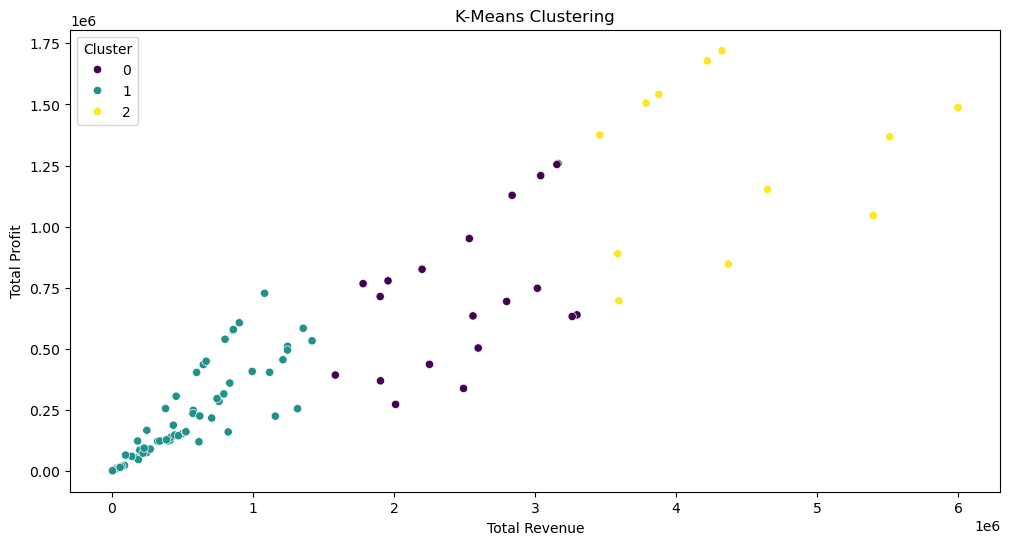

In [136]:
# Visualizing Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Total Revenue', y='Total Profit', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.legend(title='Cluster')
plt.show()

In [138]:
# Save the transformed data with clusters
data.to_csv('clustered_amazon_sales_data.csv', index=False)